In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


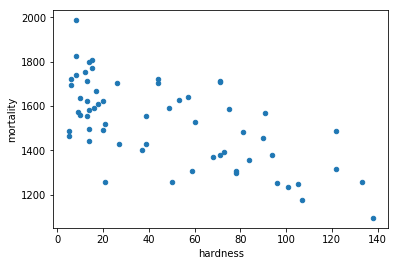

In [5]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [6]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
X = df[['hardness']]
y = df['mortality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [24]:
model.score(X_test, y_test)

0.5046490611017092

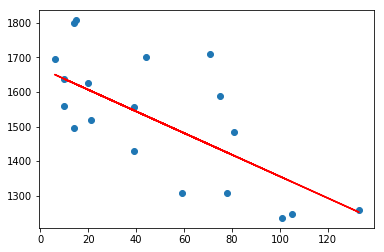

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

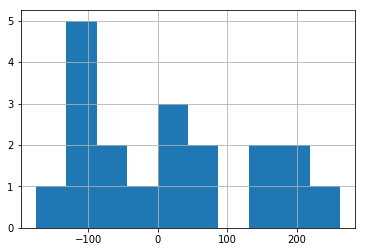

In [33]:
residuals = y_test - y_pred
residuals.hist()

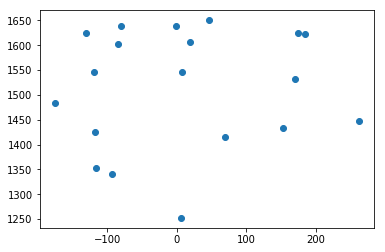

In [31]:
plt.scatter(residuals,y_pred)

plt.show()

In [36]:
df_south = df[ df['location'] == 'South']
df_north = df[ df['location'] == 'North']

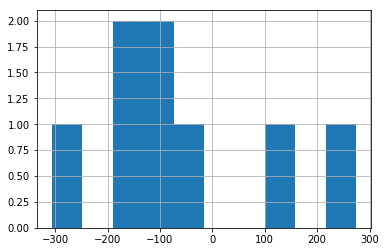

In [49]:
X = df_south[['hardness']]
y = df_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
residuals.hist()

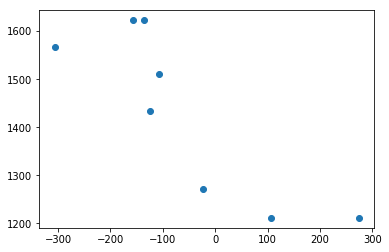

In [50]:
plt.scatter(residuals,y_pred)
plt.show()

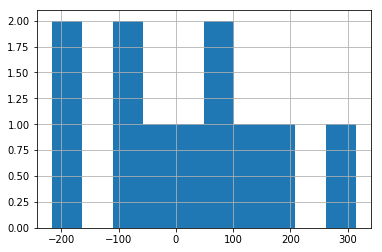

In [51]:
X = df_north[['hardness']]
y = df_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
residuals.hist()

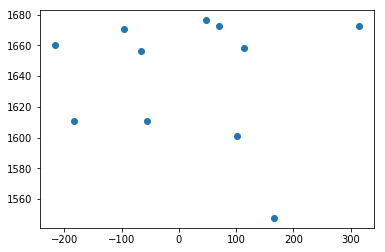

In [52]:
plt.scatter(residuals,y_pred)
plt.show()